### Dataset Dictionary

Header | Definition
---|---------
`URL`| The URL of the comic character on the Marvel Wikia
`Name/Alias` | The full name or alias of the character
`Appearances` | The number of comic books that character appeared in as of April 30 
`Current?` | Is the member currently active on an avengers affiliated team?
`Gender` | The recorded gender of the character
`Probationary` | Sometimes the character was given probationary status as an Avenger, this is the date that happened
`Full/Reserve` | The month and year the character was introduced as a full or reserve member of the Avengers
`Year` | The year the character was introduced as a full or reserve member of the Avengers
`Years since joining` | 2015 minus the year
`Honorary` | The status of the avenger, if they were given "Honorary" Avenger status, if they are simply in the "Academy," or "Full" otherwise
`Death1` | Yes if the Avenger died, No if not. 
`Return1` | Yes if the Avenger returned from their first death, No if  they did not, blank if not applicable
`Death2` | Yes if the Avenger died a second time after their revival, No if they did not, blank if not applicable
`Return2` | Yes if the Avenger returned from their second death, No if they did not, blank if not applicable
`Death3` | Yes if the Avenger died a third time after their second revival, No if they did not, blank if not applicable
`Return3` | Yes if the Avenger returned from their third death, No if they did not, blank if not applicable
`Death4` | Yes if the Avenger died a fourth time after their third revival, No if they did not, blank if not applicable
`Return4` | Yes if the Avenger returned from their fourth death, No if they did not, blank if not applicable
`Death5` | Yes if the Avenger died a fifth time after their fourth revival, No if they did not, blank if not applicable
`Return5` | Yes if the Avenger returned from their fifth death, No if they did not, blank if not applicable
`Notes` | Descriptions of deaths and resurrections. 

# Questions to answer

1. How many Avengers have died at least once?
2. Top 10 Avengers Who Died the Most
3. What is the distribution of deaths among characters?
4. Did all characters die at some point?
5. Is there a difference in mortality between characters of different genders?
6. What is the relationship between the number of appearances and deaths?
7. Has mortality changed over the years?
8. Are there Avengers who died multiple times and returned?
9. Which characters are currently active or inactive?
10. Who are the characters with the most appearances who never died?
11. What is the average time since a character joined the Avengers?

## Importing Libraries

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tabulate import tabulate

plt.style.use('ggplot')

file_path = 'data/avengers.csv'

In [233]:
avengers = pd.read_csv(file_path, encoding='ISO-8859-1')

## Understanding the Data

Before diving into the analysis, it's essential to understand the structure and key characteristics of our dataset. The following functions provide a summary of the Avengers dataset:

```avengers.describe()``` gives statistical insights, such as count, mean, and standard deviation for numerical columns.

```avengers.info()``` provides a detailed overview of the dataset, including column names, data types, and missing values.

```avengers.head()``` displays the first few rows of the dataset.



In [234]:
avengers.describe()

,Appearances,Year,Years since joining
count,173.000000,173.000000,173.000000
mean,414.052023,1988.445087,26.554913
std,677.991950,30.374669,30.374669
min,2.000000,1900.000000,0.000000
25%,58.000000,1979.000000,5.000000
50%,132.000000,1996.000000,19.000000
75%,491.000000,2010.000000,36.000000
max,4333.000000,2015.000000,115.000000


In [235]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

In [236]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


## Fixing the 'Name/Alias' Column

I noticed that the column containing the names of the Avengers has some missing values.

To address this issue, we could either remove the rows with missing values or replace the empty fields with "Unknown".

However, we have the <b>URL</b> column, which contains the names of the heroes within the link. In this case, we can extract the hero names from the URL and fill in the missing values.

In [237]:
# Function to extract the character's name from the URL

def extract_name_from_url(url):
    
    # We want the part between the slashes '/' and before the parentheses '('
    
    # Like in this example: marvel.wikia.com/Jocasta_(Earth-616)
    
    match = re.search(r'/([^/]+)_\(Earth-\d+\)', url)
    
    if match:
    
        return match.group(1).replace('_', ' ') # Replace '_' with a space
    
    return None


In [238]:
# Fill the 'Name/Alias' column with the extracted name from the 'URL' column
# if there are any missing values in 'Name/Alias'

avengers ['Name/Alias'] = avengers['Name/Alias'].fillna(avengers['URL'].apply(extract_name_from_url))

### How many Avengers have died at least once?

In [239]:
# Create a new column 'Died' that will be True if any of the 'Death1' to 'Death5' columns contain 'YES'
avengers['Died'] = avengers[['Death1','Death2', 'Death3', 'Death4', 'Death5']].apply(lambda x: 'YES' in x.values, axis=1)

# Sum up the number of Avengers who have died at least once
dead_avengers = avengers['Died'].sum()

print(f'Number of Avengers who died at least once: {dead_avengers}')

Number of Avengers who died at least once: 69


In [240]:
# Get the count of Avengers who have died and those who haven't
died_counts = avengers['Died'].value_counts()

C:\Users\claud\AppData\Local\Temp\ipykernel_14744\2389200824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=died_counts.index, y=died_counts.values, palette='viridis')


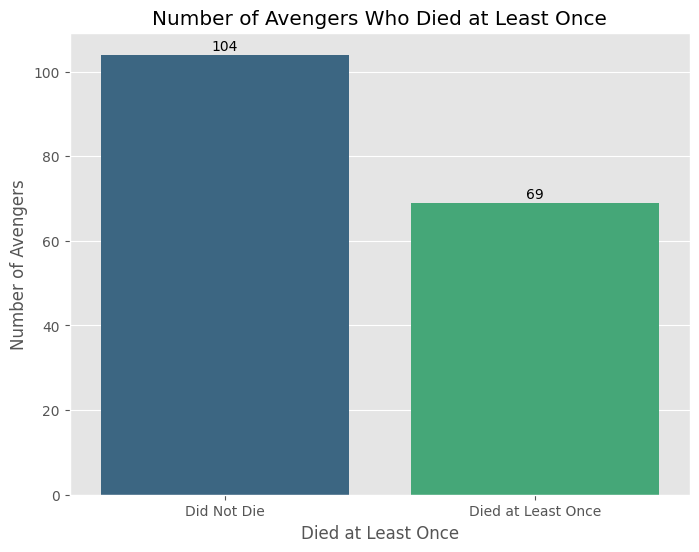

In [241]:
plt.figure(figsize=(8, 6))
sns.barplot(x=died_counts.index, y=died_counts.values, palette='viridis')

plt.title('Number of Avengers Who Died at Least Once')
plt.xlabel('Died at Least Once')
plt.ylabel('Number of Avengers')

plt.xticks(ticks=[0, 1], labels=['Did Not Die', 'Died at Least Once'])

# Adding value labels on top of the bars
for i, v in enumerate(died_counts.values):
    plt.text(i, v + 1, str(v), color='black', ha='center')

plt.show()


### Top 10 Avengers Who Died the Most

In [242]:
# List of columns representing different death occurrences
death_columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

# Create a new column 'Total_Deaths' that sums the number of times 'YES' appears across the death columns
avengers['Total_Deaths'] = avengers[death_columns].apply(lambda x: x.str.contains('YES').sum(), axis=1)


In [243]:
# Sort the Avengers by the 'Total_Deaths' in descending order and select the top 10
top_10_deaths = avengers.sort_values(by = 'Total_Deaths', ascending = False).head(10)

In [244]:
top_10_deaths

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Died,Total_Deaths
32,http://marvel.wikia.com/Jocasta_(Earth-616)#,Jocasta,141,YES,FEMALE,Jul-80,Nov-88,1988,27,Full,...,YES,YES,YES,YES,YES,YES,YES,"From her article: Death1: ""Defeated Ultron and...",True,5
29,http://marvel.wikia.com/Mar-Vell_(Earth-616)#,Mar-Vell,254,NO,MALE,NaN,Jul-78,1978,37,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,The bad penny of the Marvel universe. First ki...,True,3
20,http://marvel.wikia.com/Matthew_Hawk_(Earth-616)#,Matthew Liebowitz (birth name),197,NO,MALE,NaN,Aug-75,1975,40,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,Died during Return_to_the_Old_West. Resurrecte...,True,2
7,http://marvel.wikia.com/Clint_Barton_(Earth-616),Clinton Francis Barton,1456,YES,MALE,NaN,May-65,1965,50,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,Dies in exploding Kree ship in Averngers Vol. ...,True,2
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,True,2
18,http://marvel.wikia.com/Heather_Douglas_(Earth...,Heather Douglas,332,NO,FEMALE,Jul-75,Sep-76,1976,39,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Defenders_Vol_1_152. Later 'Obtained a...,True,2
81,http://marvel.wikia.com/Deathcry_(Earth-616)#,Deathcry,50,NO,FEMALE,NaN,Jul-93,1993,22,Honorary,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,Reduced her to a pile of bones and organsby V...,True,2
88,http://marvel.wikia.com/Jonathan_Hart_(Earth-6...,Jonathan Hart,126,NO,MALE,NaN,1-Aug,2001,14,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,First died in a zero energy explosion in space...,True,2
73,http://marvel.wikia.com/Peter_Parker_(Earth-616)#,Peter Benjamin Parker,4333,YES,MALE,NaN,Apr-90,1990,25,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,Since joining the New Avengers: First death Ki...,True,2
53,http://marvel.wikia.com/Ravonna_Renslayer_(Ear...,Ravonna Lexus Renslayer,41,NO,FEMALE,NaN,May-88,1988,27,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,Killed in Avengers_Vol_1_24. Revived by the Gr...,True,2


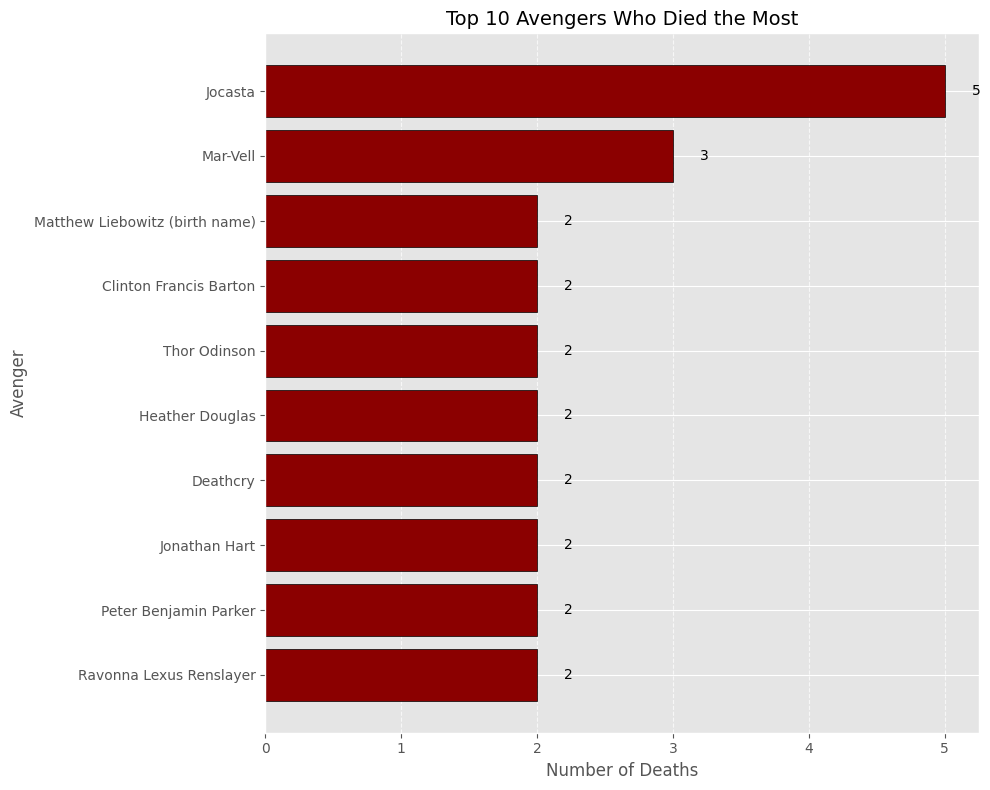

In [245]:
plt.figure(figsize=(10, 8))
plt.barh(top_10_deaths['Name/Alias'], top_10_deaths['Total_Deaths'], color='darkred', edgecolor='black')

plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Avenger', fontsize=12)
plt.title('Top 10 Avengers Who Died the Most', fontsize=14)
plt.gca().invert_yaxis() 


for index, value in enumerate(top_10_deaths['Total_Deaths']):
    plt.text(value + 0.2, index, str(value), color='black', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


### Have all characters died at some point?

In [246]:
# Check if all characters have died at least once by using the 'Died' column
all_characters_died = avengers['Died'].all()

# If all characters died, print that information
if all_characters_died:
    print('All characters have died')
else:
    # If not all characters died, print how many have not died
    print('Not all characters have died')
    
    # Filter the list of characters who have never died
    never_died = avengers[~avengers['Died']]
    
    print(f'Number of characters who have not died: {len(never_died)}')
    
    # Create a list of characters who have never died
    never_died_list = never_died[['Name/Alias']].reset_index(drop=True).values.tolist()
    
    # Display the list in a fancy grid format using 'tabulate'
    print("\nCharacters who have not died:")
    print(tabulate(never_died_list, headers=['Name/Alias'], tablefmt='fancy_grid'))


Not all characters have died
Number of characters who have not died: 104

Characters who have not died:
╒═════════════════════════════════════╕
│ Name/Alias                          │
╞═════════════════════════════════════╡
│ Richard Milhouse Jones              │
├─────────────────────────────────────┤
│ Heracles                            │
├─────────────────────────────────────┤
│ T'Challa                            │
├─────────────────────────────────────┤
│ Dane Whitman                        │
├─────────────────────────────────────┤
│ Henry P. McCoy                      │
├─────────────────────────────────────┤
│ Yondu Udonta                        │
├─────────────────────────────────────┤
│ Martinex T'Naga                     │
├─────────────────────────────────────┤
│ Charlie-27                          │
├─────────────────────────────────────┤
│ Nicholette Gold                     │
├─────────────────────────────────────┤
│ Stakar                              │
├───────────────

### What is the distribution of deaths among characters?

In [247]:
# Create a 'Total_Deaths' column that counts non-null values across the death columns
avengers['Total_Deaths'] = avengers[death_columns].apply(lambda x: sum(pd.notna(x)), axis=1)

# Display each Avenger's name along with their total deaths
avengers[['Name/Alias', 'Total_Deaths']]

,Name/Alias,Total_Deaths
0,"Henry Jonathan ""Hank"" Pym",1
1,Janet van Dyne,1
2,"Anthony Edward ""Tony"" Stark",1
3,Robert Bruce Banner,1
4,Thor Odinson,2
...,...,...
168,Eric Brooks,1
169,Adam Brashear,1
170,Victor Alvarez,1
171,Ava Ayala,1


### Distribution of Number of Deaths Among Avengers

This histogram shows the distribution of the number of deaths among Avengers characters. Each bar represents the count of characters that have experienced a specific number of deaths. The x-axis shows the number of deaths, while the y-axis represents the number of Avengers with that number of deaths.


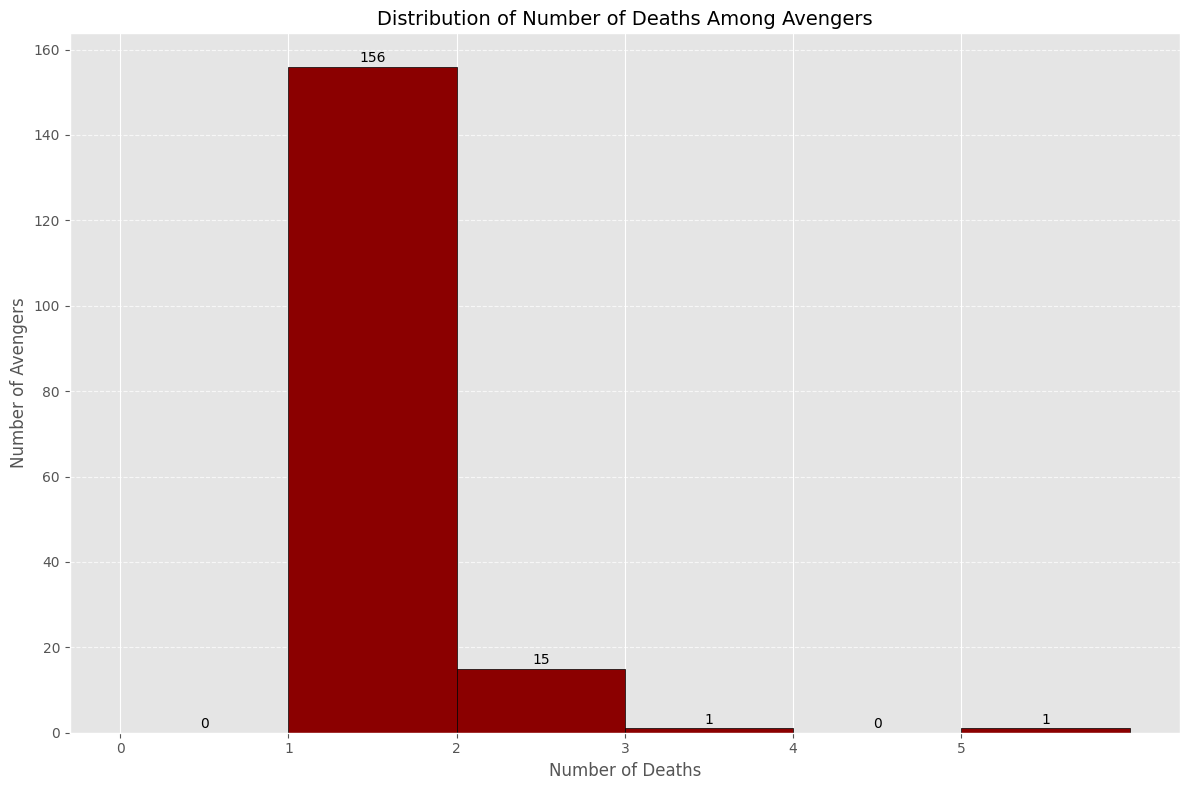

In [248]:
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(avengers['Total_Deaths'].dropna(),bins=range(int(avengers['Total_Deaths'].max() + 2)), edgecolor='black',color='darkred')


plt.title('Distribution of Number of Deaths Among Avengers', fontsize=14)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Number of Avengers', fontsize=12)
plt.xticks(range(int(avengers['Total_Deaths'].max() + 1)))
plt.grid(axis='y', linestyle='--', alpha=0.7)


for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count + 1, f'{int(count)}', fontsize=10, color='black', ha='center')


plt.tight_layout()
plt.show()


### How many times have the Avengers returned from death?

In [249]:
# Calculate the number of returns by counting how many 'YES' values appear in the return columns
return_counts = avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']].apply(lambda x: x.str.contains('YES', na=False).sum(), axis=1)

# Sum the total number of returns from death across all Avengers
total_returns = return_counts.sum()

# Print the total number of returns
print(f'Total number of returns from death: {total_returns}')

Total number of returns from death: 57


In [250]:
# Create a 'Total_Returns' column to store the number of returns for each Avenger
avengers['Total_Returns'] = avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']].apply(lambda x: x.str.contains('YES', na=False).sum(), axis=1)

# Calculate the distribution of total returns among characters
return_distribution = avengers['Total_Returns'].value_counts().sort_index()

In [251]:
print(return_distribution)

Total_Returns
0    127
1     38
2      7
5      1
Name: count, dtype: int64


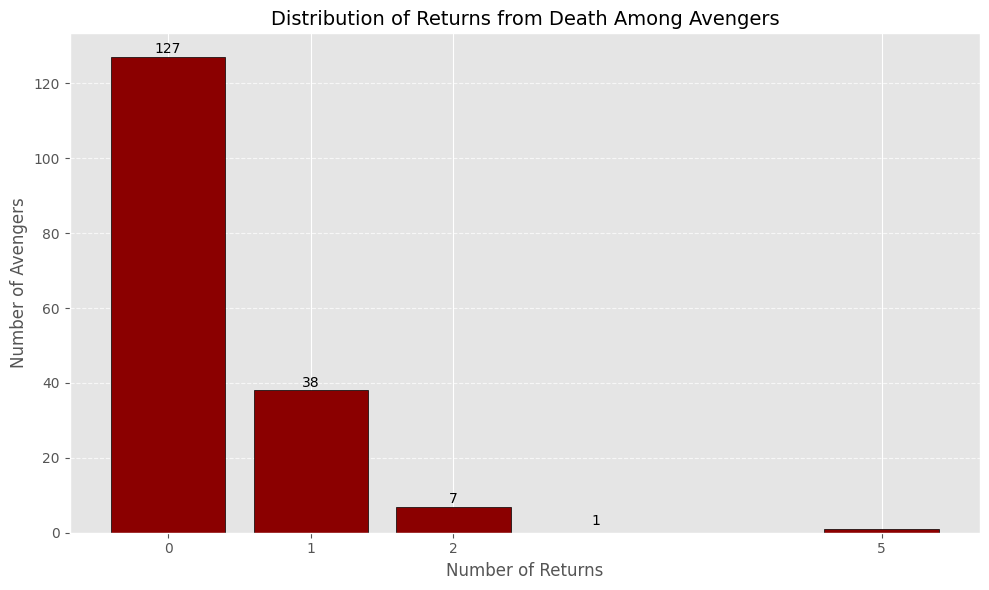

In [252]:
plt.figure(figsize=(10, 6))
plt.bar(return_distribution.index, return_distribution.values, color='darkred', edgecolor='black')


plt.title('Distribution of Returns from Death Among Avengers', fontsize=14)
plt.xlabel('Number of Returns', fontsize=12)
plt.ylabel('Number of Avengers', fontsize=12)
plt.xticks(return_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(return_distribution.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, color='black')


plt.tight_layout()
plt.show()


### Is there a difference in mortality between characters of different genders?

In [253]:
# Group Avengers by gender and calculate the total deaths for each gender
deaths_by_gender = avengers.groupby('Gender')['Total_Deaths'].sum()

deaths_by_gender

Gender
FEMALE     67
MALE      127
Name: Total_Deaths, dtype: int64

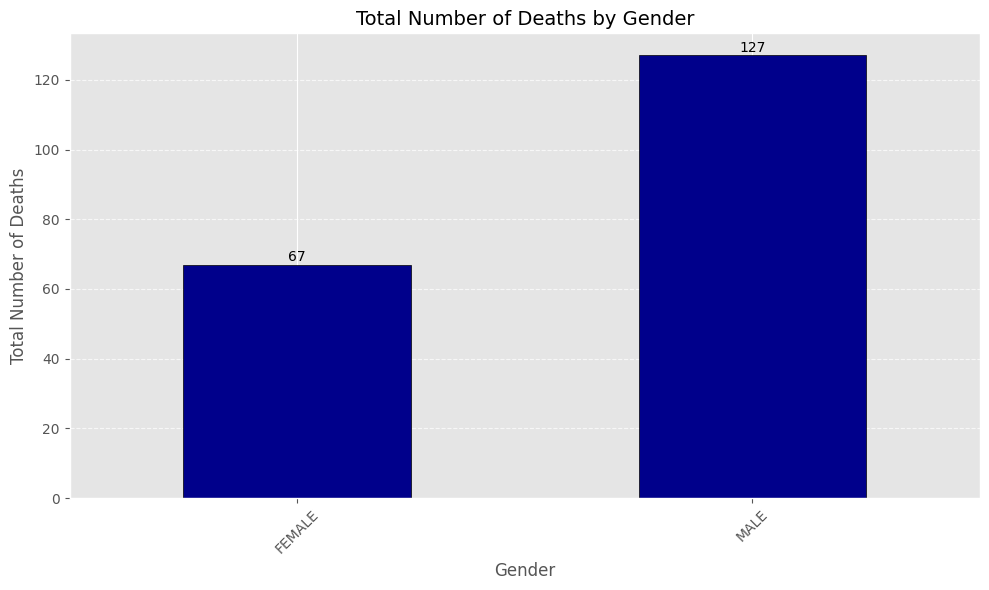

In [254]:
plt.figure(figsize=(10, 6))
deaths_by_gender.plot(kind='bar', color='darkblue', edgecolor='black')


plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Number of Deaths', fontsize=12)
plt.title('Total Number of Deaths by Gender', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(deaths_by_gender):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Has Avengers mortality changed over the years?

In [255]:
# Group Avengers by the year they were introduced and calculate the total deaths for each year
deaths_by_year = avengers.groupby('Year')['Died'].sum()

# Reset the index and rename the column to 'Total_Deaths' for better readability
mortality_df = deaths_by_year.reset_index(name='Total_Deaths')

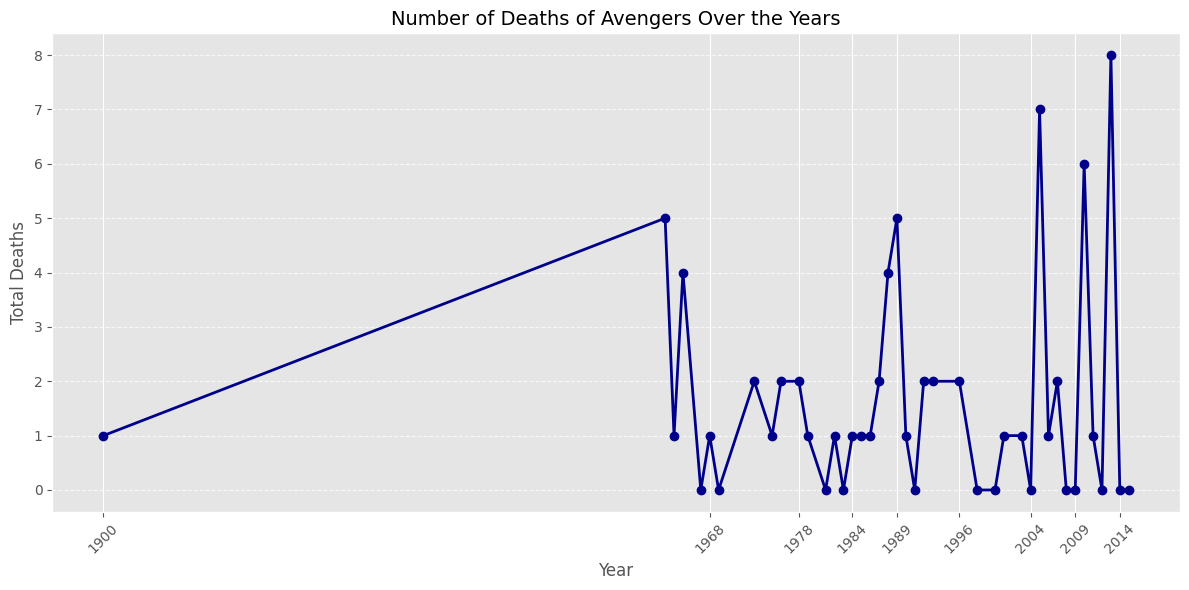

In [256]:
plt.figure(figsize=(12, 6))
plt.plot(mortality_df['Year'], mortality_df['Total_Deaths'], marker='o', color='darkblue', linewidth=2, markersize=6)


plt.title('Number of Deaths of Avengers Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)


plt.xticks(mortality_df['Year'][::5], rotation=45, fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


### Are there Avengers who died multiple times and returned?

In [257]:
# Filter Avengers who died more than once and returned from death at least once
multiple_deaths_returned = avengers[(avengers[['Death2', 'Death3', 'Death4', 'Death5']] == 'YES').any(axis=1) &
         (avengers[['Return1', 'Return2', 'Return3', 'Return4', 'Return5']] == 'YES').any(axis=1)]

# Select columns with names, deaths, and returns
multiple_deaths_returned_names = multiple_deaths_returned[['Name/Alias', 'Death1', 'Death2', 'Death3', 'Death4', 'Death5', 'Return1', 'Return2', 'Return3', 'Return4', 'Return5']]
multiple_deaths_returned_names

,Name/Alias,Death1,Death2,Death3,Death4,Death5,Return1,Return2,Return3,Return4,Return5
4,Thor Odinson,YES,YES,NaN,NaN,NaN,YES,NO,NaN,NaN,NaN
7,Clinton Francis Barton,YES,YES,NaN,NaN,NaN,YES,YES,NaN,NaN,NaN
18,Heather Douglas,YES,YES,NaN,NaN,NaN,YES,YES,NaN,NaN,NaN
20,Matthew Liebowitz (birth name),YES,YES,NaN,NaN,NaN,YES,NO,NaN,NaN,NaN
29,Mar-Vell,YES,YES,YES,NaN,NaN,YES,YES,NO,NaN,NaN
32,Jocasta,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES
51,Anthony Ludgate Druid,YES,YES,NaN,NaN,NaN,YES,YES,NaN,NaN,NaN
52,Marrina Smallwood,YES,YES,NaN,NaN,NaN,YES,YES,NaN,NaN,NaN
53,Ravonna Lexus Renslayer,YES,YES,NaN,NaN,NaN,YES,NO,NaN,NaN,NaN
55,Dennis Dunphy,YES,YES,NaN,NaN,NaN,YES,NO,NaN,NaN,NaN


### Which characters are currently active or inactive?

In [258]:
# Filter Avengers based on their current activity status
active_avengers = avengers[avengers['Current?'] == 'YES']
inactive_avengers = avengers[avengers['Current?'] == 'NO']

print(f"Number of active avengers: {len(active_avengers)} \n")
print(f"Number of inactive avengers: {len(inactive_avengers)} \n")

print("\nActive avengers:")
print(active_avengers['Name/Alias'].to_string(index=False))


Number of active avengers: 82 

Number of inactive avengers: 91 


Active avengers:
          Henry Jonathan "Hank" Pym
                     Janet van Dyne
        Anthony Edward "Tony" Stark
                Robert Bruce Banner
                       Thor Odinson
             Richard Milhouse Jones
                      Steven Rogers
             Clinton Francis Barton
                    Pietro Maximoff
                     Wanda Maximoff
                           Heracles
               Victor Shade (alias)
         Natalia Alianovna Romanova
                     Simon Williams
           Carol Susan Jane Danvers
               Samuel Thomas Wilson
                            Jocasta
                 Greer Grant Nelson
                   Jennifer Walters
                     Monica Rambeau
                      Reed Richards
                    Ashley Crawford
                       DeMarr Davis
                        Val Ventura
                       Craig Hollis
              Pe

In [259]:
print("\nInactive avengers:")
print(inactive_avengers['Name/Alias'].to_string(index=False))


Inactive avengers:
              Jacques Duquesne
                      T'Challa
                  Dane Whitman
                        Brandt
                Henry P. McCoy
               Heather Douglas
                  Patsy Walker
Matthew Liebowitz (birth name)
           Robert L. Frank Sr.
                  Yondu Udonta
               Martinex T'Naga
                    Charlie-27
               Nicholette Gold
                        Stakar
                Vance Astrovik
                      Mar-Vell
                          Eros
               James R. Rhodes
    Barbara Barton (nee Morse)
                 Moira Brandon
          Benjamin Jacob Grimm
                 Bonita Juarez
                  Marc Spector
                John F. Walker
           Jim Hammond (alias)
                 Miguel Santos
               Julia Carpenter
                          X-51
            Christopher Powell
                Namor McKenzie
      Scott Edward Harris Lang
         Anthony Lu

### Which characters have the most appearances and never died?

In [260]:
# Sort Avengers who have never died by their number of appearances
top_appear_never_died = never_died.sort_values(by='Appearances', ascending=False)


print("Top 10 Avengers with the most appearances who never died: ")
print(top_appear_never_died[['Name/Alias', 'Appearances']].head(10).to_string(index = False))

Top 10 Avengers with the most appearances who never died: 
                    Name/Alias  Appearances
                 Reed Richards         2125
                Henry P. McCoy         1886
    Susan Richards (nee Storm)         1761
                  Ororo Munroe         1598
                  Matt Murdock         1375
Doctor Stephen Vincent Strange         1324
      Carol Susan Jane Danvers          935
                    Carl Lucas          886
                    Anna Marie          877
                      T'Challa          780


### What is the average time (in years) since a character joined the Avengers?

In [261]:
# Calculate the average number of years since characters joined the Avengers
avg_years_since_joining = avengers['Years since joining'].mean()

print(f"The average time (in years) since a character joined the Avengers is: {avg_years_since_joining:.2f} years!")

The average time (in years) since a character joined the Avengers is: 26.55 years!
